In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
df = pd.read_csv('bank-full.csv', delimiter =';')

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


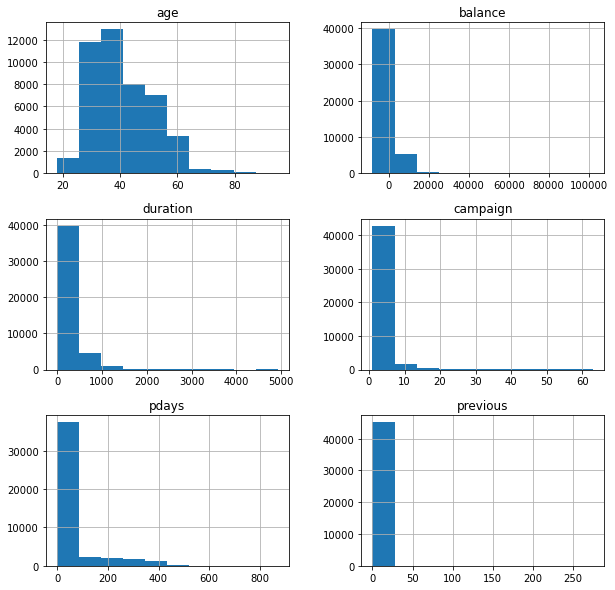

In [80]:
column = ['age', 'balance','duration','campaign', 'pdays', 'previous' ]

df.hist(column=column, figsize = (10,10))
plt.show()

In [81]:
df_x = df.drop('y',1)
df_y = df.y
df_x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


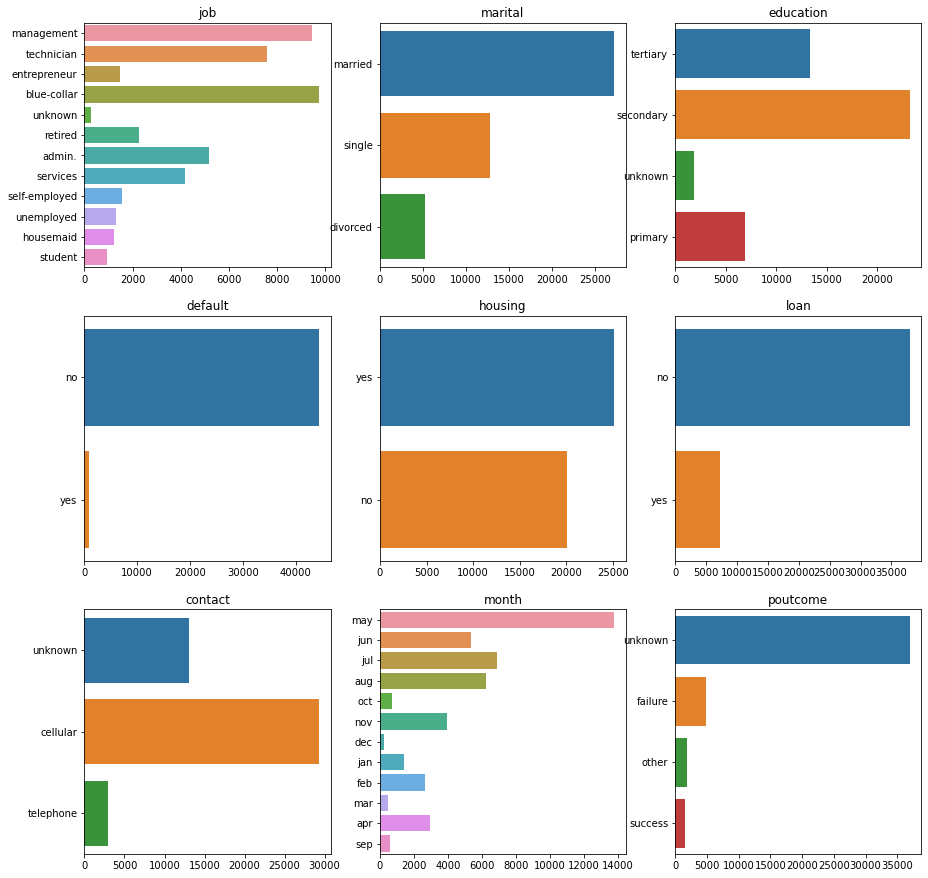

In [82]:
df_c = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for col in df_c:
    ax = plt.subplot(15,3,plotnumber)
    sns.countplot(y=col ,data=df)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(col)
    plotnumber+=1
plt.show()

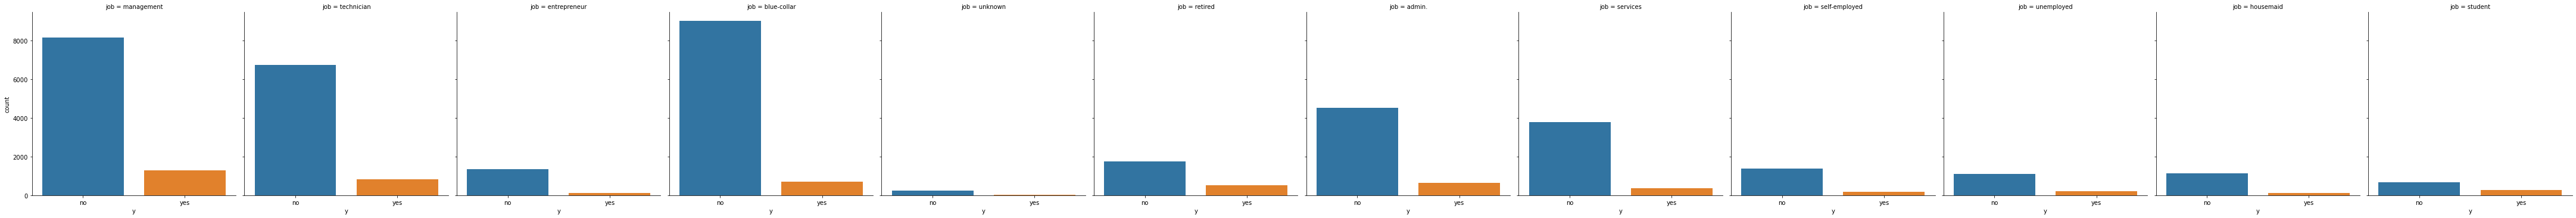

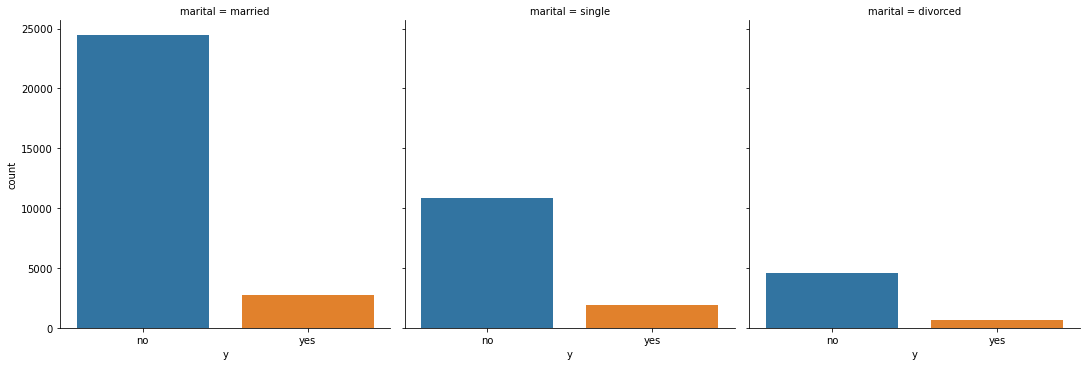

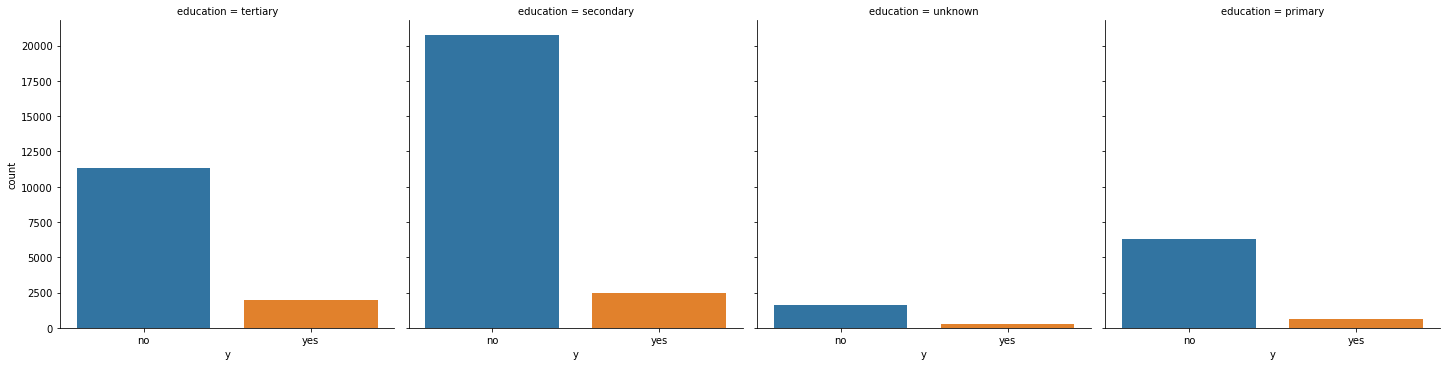

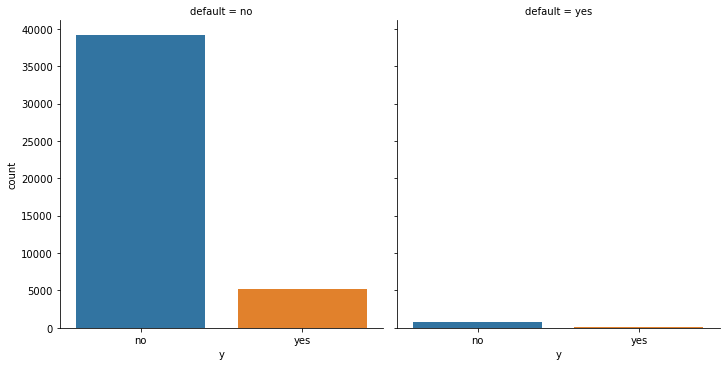

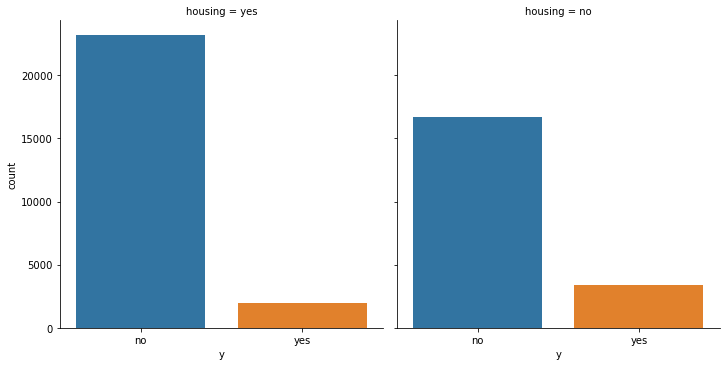

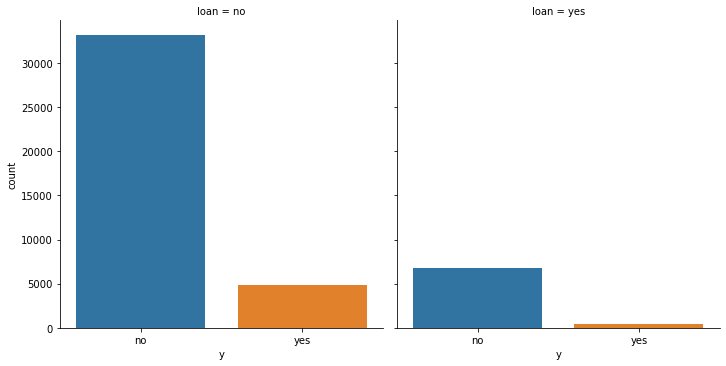

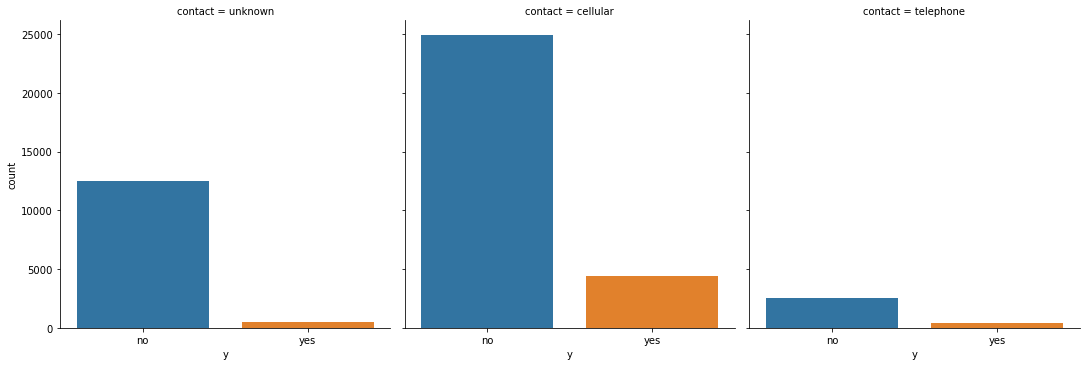

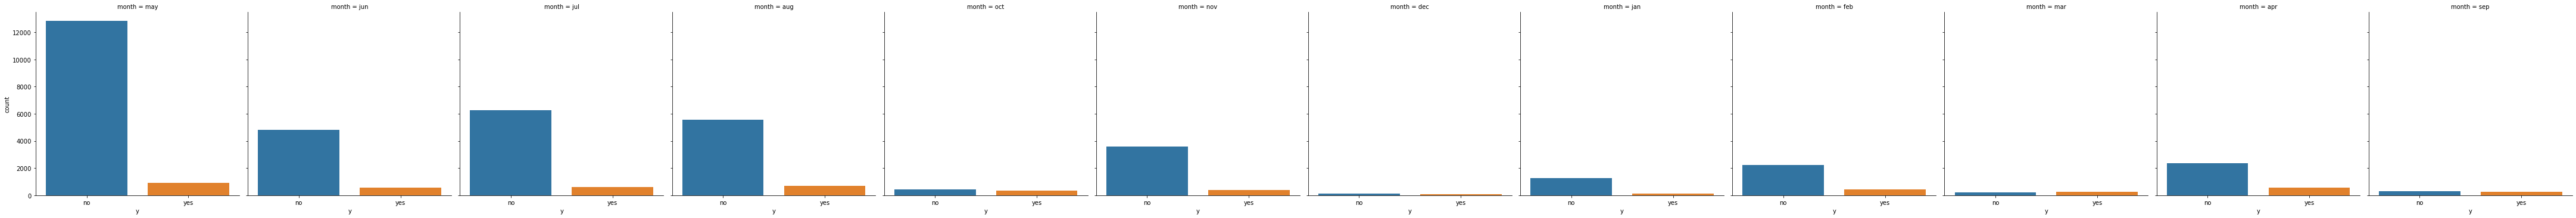

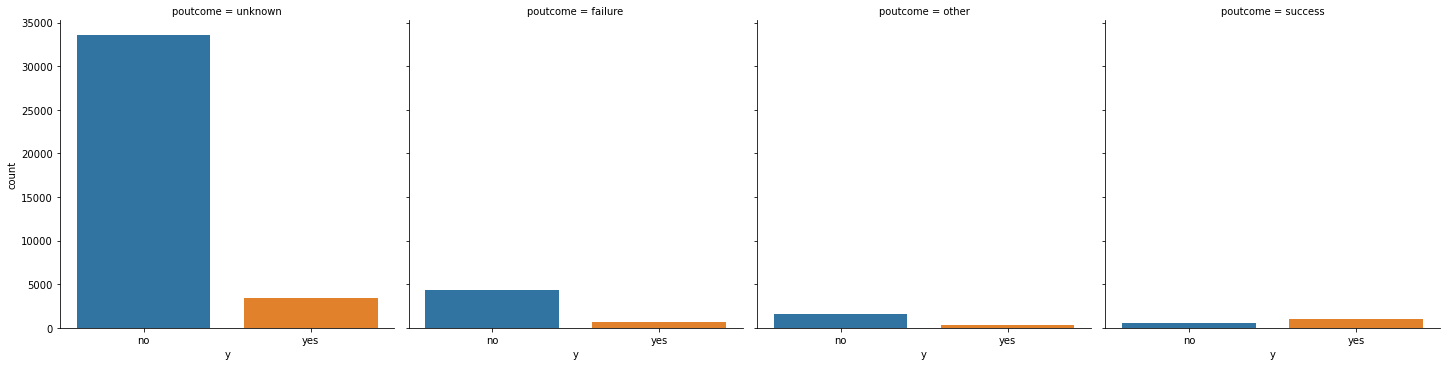

In [83]:
for col in df_c:
    sns.catplot(x='y', col=col, kind='count', data= df)
plt.show()

In [84]:
#Change yes/no features to 1/0 features

for f in ['default', 'housing', 'loan', 'y']:
    df[f] = pd.Series(np.where(df[f].values == 'yes', 1, 0), df.index)

#Replace month names with numeric month
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df['month'] = df['month'].apply(lambda x : months[x])

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,11,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,11,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,11,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,11,508,4,-1,0,unknown,0


In [85]:
deposit_byjob = df.groupby('job')['y'].mean().sort_values(ascending=False)
deposit_bymarital = df.groupby('marital')['y'].mean().sort_values(ascending=False)
deposit_byeducation = df.groupby('education')['y'].mean().sort_values(ascending=False)
print('Percentage of Deposit by job, marital and education')
print(deposit_byjob)
print(deposit_bymarital)
print(deposit_byeducation)

Percentage of Deposit by job, marital and education
job
student          0.286780
retired          0.227915
unemployed       0.155027
management       0.137556
admin.           0.122027
self-employed    0.118429
unknown          0.118056
technician       0.110570
services         0.088830
housemaid        0.087903
entrepreneur     0.082717
blue-collar      0.072750
Name: y, dtype: float64
marital
single      0.149492
divorced    0.119455
married     0.101235
Name: y, dtype: float64
education
tertiary     0.150064
unknown      0.135703
secondary    0.105594
primary      0.086265
Name: y, dtype: float64


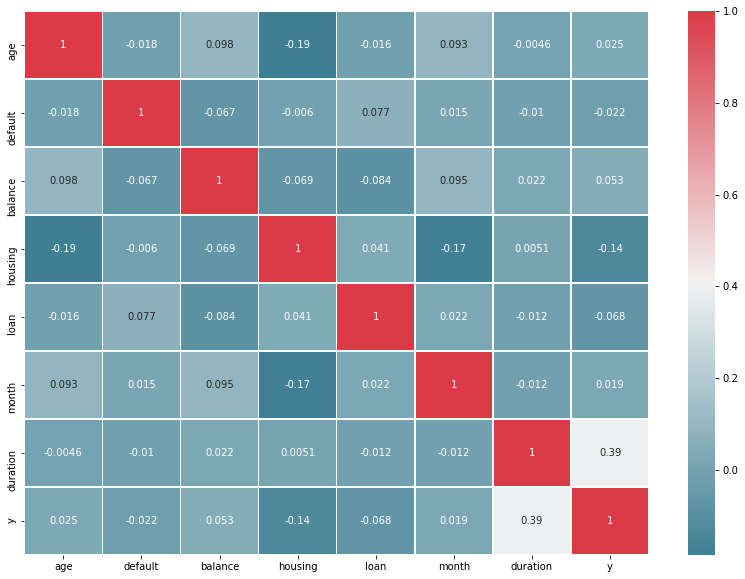

In [86]:
numerical_features = ['age',
                     'job',
 'marital',
 'education',
 'default',
'balance',
 'housing',
 'loan',
 'contact',
 'month',
'duration',
 'poutcome']
numerical_features_y = numerical_features + ['y']
plt.figure(figsize=(14,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[numerical_features_y].corr(), cmap=cmap, annot=True, linewidths=.5);

In [87]:
df_x = pd.get_dummies(df_x)
df= pd.get_dummies(df)
df_x.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [88]:
###LOGISTICS REGRESSION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


x_train, x_cv, y_train, y_cv = train_test_split(df_x, df_y, test_size=0.3) 


model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                   intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs',
                   max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

pred_cv = model.predict(x_cv)


print(accuracy_score(y_cv, pred_cv))
matrix=confusion_matrix(y_cv, pred_cv)
print(matrix)

C:\Users\fadli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8907401946328517
[[11707   240]
 [ 1242   375]]


In [89]:
###DECISION TREE

from sklearn import tree


dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                       random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

pred_cv1 = dt.predict(x_cv)
print(accuracy_score(y_cv, pred_cv1))
matrix1=confusion_matrix(y_cv, pred_cv1)
print(matrix1)

0.8768062518431141
[[11106   841]
 [  830   787]]


In [91]:
###RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                       bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                       warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

pred_cv2 = rf.predict(x_cv)
print(accuracy_score(y_cv, pred_cv2))
matrix2=confusion_matrix(y_cv, pred_cv2)
print(matrix2)


0.9042317900324388
[[11631   316]
 [  983   634]]


In [92]:
def get_features_importances(model, features=df_x):
    print('Features Importance')
    idx = reversed(np.argsort(model.feature_importances_))
    for i in idx:
        importance = round(model.feature_importances_[i], 3)
        if importance > 0.001:
            print(df_x.columns[i] + ': ' + str(importance))

In [93]:
get_features_importances(rf)

Features Importance
duration: 0.265
balance: 0.093
age: 0.091
day: 0.079
poutcome_success: 0.052
pdays: 0.038
campaign: 0.037
previous: 0.019
housing_yes: 0.014
month_apr: 0.014
month_mar: 0.012
education_secondary: 0.012
housing_no: 0.012
marital_married: 0.011
education_tertiary: 0.011
month_oct: 0.011
job_technician: 0.011
job_management: 0.011
month_jun: 0.01
month_aug: 0.01
marital_single: 0.01
contact_cellular: 0.01
month_may: 0.009
job_admin.: 0.009
month_sep: 0.009
job_blue-collar: 0.008
month_jul: 0.008
month_feb: 0.008
contact_unknown: 0.008
month_nov: 0.008
poutcome_failure: 0.008
marital_divorced: 0.007
poutcome_unknown: 0.007
education_primary: 0.007
job_services: 0.006
loan_yes: 0.006
loan_no: 0.006
job_retired: 0.005
education_unknown: 0.005
month_jan: 0.005
job_unemployed: 0.005
contact_telephone: 0.005
poutcome_other: 0.005
job_self-employed: 0.005
job_student: 0.004
month_dec: 0.004
job_entrepreneur: 0.004
job_housemaid: 0.003


In [94]:
###SVM Algorithm

from sklearn import svm
svm_model =  svm.SVC()
svm_model.fit(x_train, y_train)

svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True,
    probability=False, tol=0.001, cache_size=200, class_weight=None, 
    verbose=False, max_iter= -1, decision_function_shape='ovr', break_ties=False, random_state=None)

pred_cv3 = svm_model.predict(x_cv)
print(accuracy_score(y_cv, pred_cv3))
matrix3=confusion_matrix(y_cv, pred_cv3)
print(matrix3)

0.881156001179593
[[11939     8]
 [ 1604    13]]


In [95]:
###NAIVE BAYES

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

pred_cv4 = nb.predict(x_cv)
print(accuracy_score(y_cv, pred_cv4))
matrix4=confusion_matrix(y_cv, pred_cv4)
print(matrix4)

0.8470952521380124
[[10607  1340]
 [  734   883]]


In [96]:
###KNNEIGHBOHRS

from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)

pred_cv5 = kNN.predict(x_cv)
print(accuracy_score(y_cv, pred_cv5))
matrix5=confusion_matrix(y_cv, pred_cv5)
print(matrix5)

0.8798289590091418
[[11490   457]
 [ 1173   444]]


In [97]:
print(
'Pelajar dan pensiunan cenderung melakukan deposit, nasabah yang masih single cenderung melakukan deposit, pendidikan yang lebih tinggi cenderung mendorong nasabah melakukan deposit')

print(

'Algoritma yang paling mendukung dalam menentukan prediksi nasabah yang melakukan deposit adalah Random Forest' )

print(
'Faktor yang paling penting agar nasabah melakukan deposit bank adalah durasi percakapan, saldo dan umur')



Pelajar dan pensiunan cenderung melakukan deposit, nasabah yang masih single cenderung melakukan deposit, pendidikan yang lebih tinggi cenderung mendorong nasabah melakukan deposit
Algoritma yang paling mendukung dalam menentukan prediksi nasabah yang melakukan deposit adalaha Random Forest
Faktor yang paling penting agar nasabah melakukan deposit bank adalah durasi percakapan, saldo dan umur
